In [1]:
import torch
import numpy as np
import PIL
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from IPython.display import Image
import scipy.io as sio
from layers import SinkhornDistance

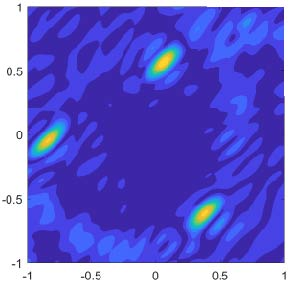

In [10]:
Image("smp_imgs/Ex1-MMSM-0to90.jpg")

In [2]:
img = PIL.Image.open('./smp_imgs/Ex1-MMSM-0to90.jpg')
test_data = sio.loadmat('./22_data/1_target/MSR-Data.mat')

In [3]:
tf=transforms.ToTensor()
img_t=tf(img)
img_t=img_t.permute(1,2,0)   # 0,1,2 => 1,2,0 

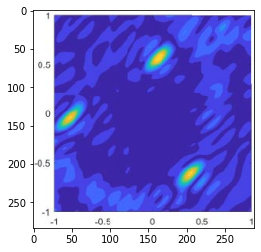

In [6]:
plt.imshow(img_t)

In [36]:
print(img_t.size())

torch.Size([284, 289, 3])


In [9]:
print(img_t)

tensor([[[1.0000],
         [1.0000],
         [1.0000],
         ...,
         [0.9961],
         [0.9882],
         [1.0000]],

        [[1.0000],
         [1.0000],
         [1.0000],
         ...,
         [0.9961],
         [0.9882],
         [1.0000]],

        [[1.0000],
         [1.0000],
         [1.0000],
         ...,
         [0.9961],
         [1.0000],
         [1.0000]],

        ...,

        [[1.0000],
         [1.0000],
         [1.0000],
         ...,
         [1.0000],
         [1.0000],
         [1.0000]],

        [[1.0000],
         [1.0000],
         [1.0000],
         ...,
         [1.0000],
         [1.0000],
         [1.0000]],

        [[1.0000],
         [1.0000],
         [1.0000],
         ...,
         [1.0000],
         [1.0000],
         [1.0000]]])


In [5]:
img_g=torchvision.transforms.functional.rgb_to_grayscale(img)

In [6]:
img_g_t=tf(img_g)
img_g_t=img_g_t.permute(1,2,0)   # 0,1,2 => 1,2,0 
#print(img_g_t.shape)

In [10]:
img0 = PIL.Image.open('./smp_imgs/Ex1-MMSM-0to90_g.jpg')
img0_t=tf(img0)
img0_t=img0_t.permute(1,2,0)   # 0,1,2 => 1,2,0 

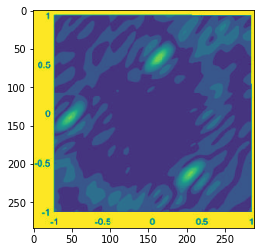

In [50]:
plt.imshow(img0_t);

In [34]:
[torch.norm(img_g_t),torch.norm(img0_t)]

[tensor(148.0397), tensor(147.6579)]

In [19]:
trans = transforms.Compose([transforms.Resize((100,100)),
                            transforms.Grayscale(),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5),(0.5))])    # 1-channel
img_set = torchvision.datasets.ImageFolder(root="./smp_imgs/images/for_loading", transform=trans)

In [29]:
len(img_set)

10

In [8]:
classes=img_set.classes
classes

['c_imgs', 'g_imgs']

In [20]:
[torch.norm((img_set[0])[0]-((img_set[3])[0])), # each element is of the form (tensor, class index)
 torch.norm((img_set[1])[0]-((img_set[3])[0])),
 torch.norm((img_set[2])[0]-((img_set[3])[0]))] # => 2-norm works

[tensor(16.8880), tensor(19.1214), tensor(23.3642)]

In [38]:
# 1-Wasserstein distance? 
# Make the data into the prob. distribution first?

Wasserstein distance: 1.590


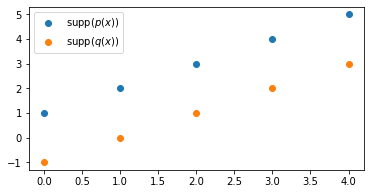

In [5]:
n_points = 5
a = np.array([[i, i+1] for i in range(n_points)])
b = np.array([[i, i-1] for i in range(n_points)])

plt.figure(figsize=(6, 3))
plt.scatter(a[:, 0], a[:, 1], label='supp($p(x)$)')
plt.scatter(b[:, 0], b[:, 1], label='supp($q(x)$)')
plt.legend();

x = torch.tensor(a, dtype=torch.float)
y = torch.tensor(b, dtype=torch.float)
vals = torch.ones((2,n_points), dtype=torch.float)
#vals = torch.tensor([[1,0,0,0,0],[1,0,0,0,0]])

sinkhorn = SinkhornDistance(eps=0.01, max_iter=100, reduction=None)   # eps should be small
dist, P, C = sinkhorn(x, y,vals)
print("Wasserstein distance: {:.3f}".format(dist.item()))  # unif case => 1.590...=sqrt(2.6); delta_0 => 2

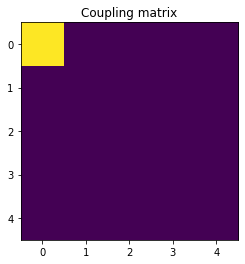

In [22]:
plt.imshow(P)
plt.title('Coupling matrix');

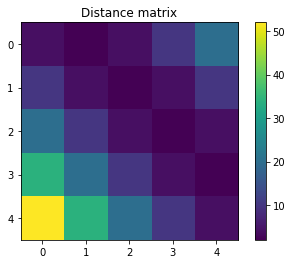

In [4]:
plt.imshow(C)
plt.title('Distance matrix')
plt.colorbar()

In [35]:
sorted(test_data.keys())
test_mat = test_data['MSR_Full']
test_t = tf(test_mat)
test_t = test_t.permute(1,2,0).squeeze()    #size : 256*10000